# Tutorial on MEEP simulation run with phcr-cavity.py
The tutorial is based on __[documentation example](https://meep.readthedocs.io/en/latest/Python_Tutorials/Resonant_Modes_and_Transmission_in_a_Waveguide_Cavity/)__. 

To run the simulation we have to address the python translator by running system command with <b>!</b> symbol. 

We run simulation code <b>phcr-cavity.py</b>

The console output is saved at <b>Output.txt</b>

In [ ]:
! python phcr-cavity_sim.py

In [16]:
! python phcr-cavity_sim.py -defect false

Using MPI version 3.1, 1 processes
-----------
Initializing structure...
time for choose_chunkdivision = 0.000931978 s
Working in 3D dimensions.
Computational cell is 16.1 x 6 x 6 with resolution 20
     prism, center = (0,0,0.129862)
          height 12.2654, axis (1,0,0), sidewall angle: 0 radians, 3 vertices:
          (-6.13272,0,0)
          (-6.13272,0.112464,0.194793)
          (-6.13272,-0.112464,0.194793)
          dielectric constant epsilon diagonal = (4.84,4.84,4.84)
     prism, center = (0,0,0.432874)
          height 0.12496, axis (1,0,0), sidewall angle: 0 radians, 3 vertices:
          (-0.06248,0,0)
          (-0.06248,0.37488,0.649311)
          (-0.06248,-0.37488,0.649311)
          dielectric constant epsilon diagonal = (4.84,4.84,4.84)
     prism, center = (0.30976,0,0.432874)
          height 0.12496, axis (1,0,0), sidewall angle: 0 radians, 3 vertices:
          (0.24728,0,0)
          (0.24728,0.37488,0.649311)
          (0.24728,-0.37488,0.649311)
          die

In [ ]:
! mpirun -np 16 python phcr-cavity_sim.py -defect false -r false -pixavg true > Output-norm-ph-cav-flux-pixel-avg.txt

In [ ]:
! mpirun -np 16 python phcr-cavity_sim.py -defect true -r false -pixavg true > Output-defect-ph-cav-flux-pixel-avg.txt

In [ ]:
! mpirun -np 16 python phcr-cavity_sim.py -defect true -r true -pixavg true > Output-defect-ph-cav-Q-factor-pixel-avg.txt

In [77]:
! mpirun -np 10 python phcr-cavity_sim.py -defect true -r true > Output-defect-ph-cav-Q-factor.txt

In [18]:
! mpirun -np 10 python phcr-cavity_sim.py -defect true > Output-defect-ph-cav-transmission.txt

In [17]:
! mpirun -np 10 python phcr-cavity_sim.py -defect false > Output-norm-ph-cav-transmission.txt

In [ ]:
! python phcr-cavity_sim.py -defect false

Using MPI version 3.1, 1 processes
-----------
Initializing structure...
time for choose_chunkdivision = 0.000907898 s
Working in 3D dimensions.
Computational cell is 16.1 x 6 x 6 with resolution 20
     prism, center = (0,0,0.129862)
          height 12.2654, axis (1,0,0), sidewall angle: 0 radians, 3 vertices:
          (-6.13272,0,0)
          (-6.13272,0.112464,0.194793)
          (-6.13272,-0.112464,0.194793)
          dielectric constant epsilon diagonal = (4.84,4.84,4.84)
     prism, center = (0,0,0.432874)
          height 0.12496, axis (1,0,0), sidewall angle: 0 radians, 3 vertices:
          (-0.06248,0,0)
          (-0.06248,0.37488,0.649311)
          (-0.06248,-0.37488,0.649311)
          dielectric constant epsilon diagonal = (4.84,4.84,4.84)
     prism, center = (0.30976,0,0.432874)
          height 0.12496, axis (1,0,0), sidewall angle: 0 radians, 3 vertices:
          (0.24728,0,0)
          (0.24728,0.37488,0.649311)
          (0.24728,-0.37488,0.649311)
          die

For optional parallel run on several core we use mpi.

We may execute  <b>mpirun -np 6 </b>  routine for running the code with 6 cores:

In [ ]:
! mpirun -np 6 python phcr-cavity.py > Output-Parallel-6.txt

In [ ]:
! mpirun -np 6 python phcr-cavity_sim.py > Output-Parallel-6.txt

# Visualize the simulation results
The results of simulation (electric and magnetic vectors and given times) can be saved in h5 file. To look at them we can use program <b>h5topng</b>

First we visualize the structure for simulation, which is stored in <b>phcr-cavity-eps-000000.00.h5</b> by executing the following command:

In [5]:
! rm create*.png

In [16]:
! rm phcr*.png

In [26]:
! rm norm-phcr*.png

In [4]:
! h5topng -S 6 -y 55:65 create_geometry_v3-eps-000000.00.h5 

In [3]:
! h5topng -S 6 -z 64:74 phcr-cavity_sim-eps-000000.00.h5

In [30]:
! h5topng -S 6 -x 45:55 phcr-cavity_sim-eps-000000.00.h5

In [15]:
! h5topng -S 6 -y 55:65 phcr-cavity_sim-eps-000000.00.h5

The result is <b>phcr-cavity-eps-000000.00.png</b>

The dynamics of the field during simulation can be visualized as an image series combined into a single video.

First we need to make a series of png frames  from h5 file by a following command:
```Bash
! h5topng -t 1:100 -S2 -Zc  dkbluered -a yarg -A phcr-cavity-eps-000000.00.h5 phcr-cavity-hz-slice.h5
```

For normal PC structure, then for a defected PC

In [24]:
! h5topng -t 1:500 -z 70 -S2 -Zc  dkbluered -a yarg -A norm-phcr-cavity_sim-eps-000000.00.h5 norm-phcr-cavity_sim-ey-slice.h5

h5topng error: invalid slice of HDF5 data


In [31]:
! h5topng -t 1:500 -z 70 -S2 -Zc  dkbluered -a yarg -A phcr-cavity-defect_sim-eps-000000.00.h5 phcr-cavity-defect_sim-ey-slice.h5 

h5topng error: invalid slice of HDF5 data


# Let's convert all files into the video file video.mp4 and remove images

In [25]:
! ffmpeg -y  -start_number 01 -i norm-phcr-cavity_sim-ey-slice.t%03d.png -r 10 -pix_fmt yuv420p -c:a libvo_aacenc -vcodec libx264 video-normal-ph-cav.mp4 > video_out-normal-ph-cav.txt

ffmpeg version 4.2.3 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7.5.0 (crosstool-NG 1.24.0.123_1667d2b)
  configuration: --prefix=/home/cloud-user/anaconda3/envs/pmp --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1590573566052/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, image2, from 'norm-phcr-cavity_sim-ey-s

In [32]:
! ffmpeg -y  -start_number 01 -i phcr-cavity-defect_sim-ey-slice.t%03d.png -r 10 -pix_fmt yuv420p -c:a libvo_aacenc -vcodec libx264 video-defect-ph-cav.mp4 > video_out-defect-ph-cav.txt

ffmpeg version 4.2.3 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7.5.0 (crosstool-NG 1.24.0.123_1667d2b)
  configuration: --prefix=/home/cloud-user/anaconda3/envs/pmp --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1590573566052/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, image2, from 'phcr-cavity-defect_sim-ey

In [27]:
from ipywidgets import Video, Image
video = Video.from_file("video-normal-ph-cav.mp4",play=True)
video

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x01csmdat\x00\x00\…

In [34]:
from ipywidgets import Video, Image
video = Video.from_file("video-defect-ph-cav.mp4",play=True)
video

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x01[\xa4mdat\x00\x…

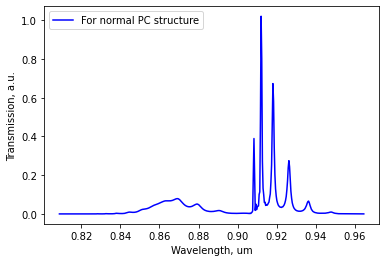

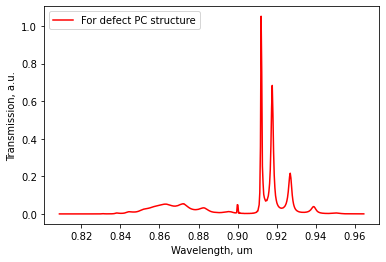

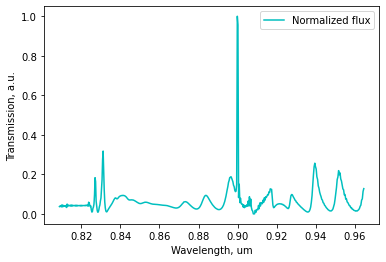

186
499
499
Quality factor of the 1D PC resonator (from the left sideband)= 1386.3636363635583


In [42]:
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt

simfileName_n ='Output-norm-ph-cav-flux-pixel-avg.txt'
fileName_n = 'flux-norm-ph-cav-pixel-avg.dat'

simfileName_d ='Output-defect-ph-cav-flux-pixel-avg.txt'
fileName_d = 'flux-defect-ph-cav-pixel-avg.dat'

ex_str_n =f'grep flux1: {simfileName_n}  | cut -d , -f2,3- | sed 1d > {fileName_n}'
ex_str_d =f'grep flux1: {simfileName_d}  | cut -d , -f2,3- | sed 1d > {fileName_d}'

call(ex_str_n, shell="True")
call(ex_str_d, shell="True")

f_n = np.genfromtxt(fileName_n, delimiter=",")
f_d = np.genfromtxt(fileName_d, delimiter=",")

#print(f)

#g = np.genfromtxt("flux-nh.dat", delimiter=",")

nzd_f = f_d[:,1]/f_n[:,1] # Normalized flux

fig, ax = plt.subplots()
ax.plot(1/f_n[:,0],f_n[:,1], 'b-', label='For normal PC structure')
plt.xlabel("Wavelength, um")
plt.ylabel("Transmission, a.u.")
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(1/f_d[:,0],f_d[:,1], 'r-', label='For defect PC structure')
plt.xlabel("Wavelength, um")
plt.ylabel("Transmission, a.u.")
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(1/f_d[:,0],nzd_f/max(nzd_f), 'c-', label='Normalized flux')
plt.xlabel("Wavelength, um")
plt.ylabel("Transmission, a.u.")
#plt.xlim(left=0.88, right=0.94)
plt.legend()
plt.show()


# Quality factor of the 1D PC resonator


# Search of the flux's global maximum and its cell's number
for i in range(len(nzd_f)):
    if nzd_f[i] == max(nzd_f):
        i = i
        break
    else:
         i = i + 1
print(i) #Cell's number of the flux's global maximum

# Search of the half of the maximum flux and its cell's number (left sideband)
for j in range(len(nzd_f)):
    if nzd_f[j] >= 1*max(nzd_f)/2 and nzd_f[j] <= max(nzd_f)/2:
        j = j
        break
    else:
         j = j + 1
print(j) # Cell's number of the half flux's global maximum (left sideband)

# Search of the half of the maximum flux and its cell's number (right sideband)
for k in range(len(nzd_f)):
    if nzd_f[k] >= 1*max(nzd_f)/2 and nzd_f[k] <= max(nzd_f)/2 and k > i:
        k = k
        break
    else:
         k = k + 1
print(k) # Cell's number of the half flux's global maximum (right sideband)

w_r = f_d[i,0] # Resonance frequency
w_s_l = f_d[i-1,0] # HWHM's left frequency
#w_s_r = f_d[k,0] # HWHM's right frequency
delta_w_ls = 2*(w_r - w_s_l) # FWHM (full width at half maximum) (from lef sideband) 
#delta_w_rs = -2*(w_r - w_s_r) # FWHM (full width at half maximum) (from right sideband)
Q_ls = w_r/delta_w_ls # Quality factor of the 1D PC resonator (from left sideband)
#Q_rs = w_r/delta_w_rs # Quality factor of the 1D PC resonator (from right sideband)

print('Quality factor of the 1D PC resonator (from the left sideband)=', Q_ls) 
#print('Quality factor of the 1D PC resonator (from the right sideband)=', Q_rs)

#print(w_r, w_s_l, delta_w_ls)

In [36]:
1/1.1460592280782966

0.8725552532540507

In [37]:
1/1.096419239354292

0.9120598801138553

In [14]:
1/1.0513315326541353

0.9511747426384649

In [87]:
1/1.146059228089777

0.8725552532453101